In [3]:
from api.CircuitChooser import CircuitChooser
from api.Metrics import cz_depth_metric, gate_count_metric
from impl.shors.Shors_DLP import shors_dlp

shots = 2000

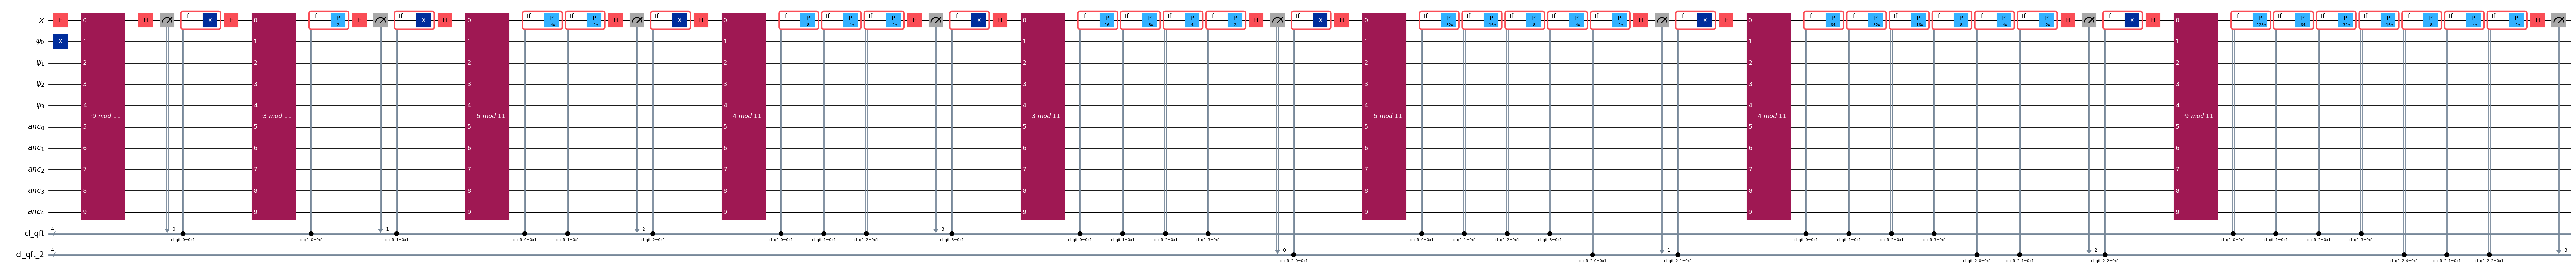

In [4]:
# g^k = 1 mod p, find k
p = 11
g = 4
b = 9
r = -1

CircuitChooser()._metric = gate_count_metric
circuit = shors_dlp(g, b, p)

circuit.draw(output='mpl', fold=-1)

In [5]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import AerSimulator

simulator = AerSimulator()
# Allow circuit to run on our backend.

circuit = generate_preset_pass_manager(backend=simulator, optimization_level=3).run(circuit)

print(circuit.count_ops())

job = simulator.run(circuit, shots=shots)

counts = job.result().get_counts()
print(counts)

OrderedDict({'ccx': 2408, 'cx': 1404, 'x': 529, 'mcx': 256, 'if_else': 35, 'h': 16, 'measure': 8})
{'1001 1110': 1, '0000 1011': 1, '0001 1100': 1, '0110 0110': 1, '1100 0101': 3, '0010 1001': 2, '1100 0110': 1, '0001 0010': 1, '1001 0001': 2, '0101 0001': 1, '0100 0010': 2, '0000 1101': 2, '0110 0001': 3, '1111 0000': 2, '0011 1101': 1, '1100 0011': 2, '1100 1111': 5, '1100 0100': 1, '1001 0110': 1, '0110 1110': 4, '0101 0100': 1, '0110 0101': 6, '1100 1010': 3, '1001 1010': 2, '1011 1100': 3, '0001 1001': 2, '1101 1101': 2, '0110 1010': 4, '0101 0011': 7, '1010 0110': 3, '0110 1001': 2, '0011 1111': 6, '1110 0100': 6, '1101 1100': 3, '0010 0100': 3, '1011 0001': 6, '1010 1100': 6, '0010 0011': 1, '1101 1111': 23, '0100 1000': 1, '1101 1000': 7, '1011 0011': 3, '1111 0001': 2, '1111 0101': 37, '1111 1101': 12, '1110 0111': 31, '0111 1110': 24, '1101 1010': 51, '1110 1100': 3, '0111 0011': 1, '1010 1001': 5, '1001 0111': 2, '0111 1011': 37, '0111 1001': 4, '1010 1111': 25, '1101 1110':

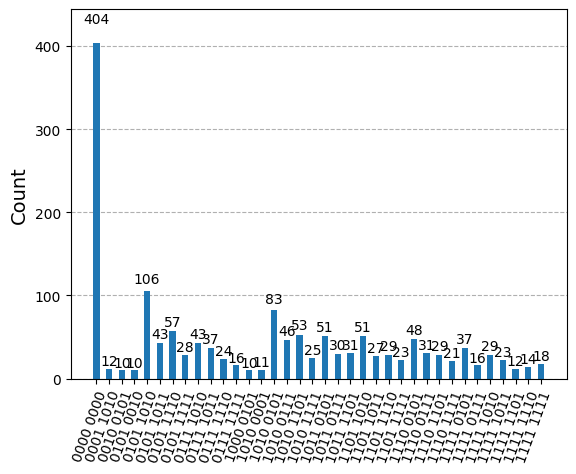

In [6]:
from qiskit.visualization import plot_histogram

# Hold back so the plots aren't too messy.
filtered_counts = dict(filter(lambda item: not (isinstance(item[1], int) and item[1] < 10), counts.items()))
plot_histogram(filtered_counts)
# plot_distribution(counts)
# plot_distribution(counts)

In [7]:
import math
from quaspy.math.groups import IntegerModRingMulSubgroupElement
from quaspy.orderfinding.general.postprocessing.ekera import solve_j_for_r

n = math.ceil(math.log2(p))

if r == -1:
    r = p - 1  # Backup frequency if all else fails, is always p - 1
    for (j, _) in counts.items():
        r_cand = solve_j_for_r(j, n, n, IntegerModRingMulSubgroupElement(g, p))
        r = min(r, r_cand)

print("Period: " + str(r))

Period: 5


In [8]:
result_list = list()
for result in counts.keys():
    # split result measurements
    result_s = result.split(" ")
    m_stage1 = int(result_s[1], 2)
    m_stage2 = int(result_s[0], 2)

    result_list.append((m_stage1, m_stage2, counts[result]))

print(result_list)

[(14, 9, 1), (11, 0, 1), (12, 1, 1), (6, 6, 1), (5, 12, 3), (9, 2, 2), (6, 12, 1), (2, 1, 1), (1, 9, 2), (1, 5, 1), (2, 4, 2), (13, 0, 2), (1, 6, 3), (0, 15, 2), (13, 3, 1), (3, 12, 2), (15, 12, 5), (4, 12, 1), (6, 9, 1), (14, 6, 4), (4, 5, 1), (5, 6, 6), (10, 12, 3), (10, 9, 2), (12, 11, 3), (9, 1, 2), (13, 13, 2), (10, 6, 4), (3, 5, 7), (6, 10, 3), (9, 6, 2), (15, 3, 6), (4, 14, 6), (12, 13, 3), (4, 2, 3), (1, 11, 6), (12, 10, 6), (3, 2, 1), (15, 13, 23), (8, 4, 1), (8, 13, 7), (3, 11, 3), (1, 15, 2), (5, 15, 37), (13, 15, 12), (7, 14, 31), (14, 7, 24), (10, 13, 51), (12, 14, 3), (3, 7, 1), (9, 10, 5), (7, 9, 2), (11, 7, 37), (9, 7, 4), (15, 10, 25), (14, 13, 29), (4, 13, 1), (13, 8, 3), (3, 8, 3), (10, 1, 12), (8, 12, 1), (7, 6, 2), (5, 7, 1), (15, 6, 6), (9, 14, 2), (11, 1, 6), (13, 14, 29), (7, 12, 5), (6, 4, 1), (10, 5, 106), (13, 12, 3), (10, 3, 9), (2, 7, 6), (5, 14, 48), (1, 13, 1), (11, 15, 23), (14, 3, 4), (11, 13, 27), (7, 8, 6), (2, 15, 3), (12, 15, 3), (10, 15, 29), (14, 

In [9]:
from quaspy.logarithmfinding.general.postprocessing import solve_j_k_for_d_given_r
from quaspy.orderfinding.general.postprocessing.ekera import solve_j_for_r_mod_N

num_correct = 0
num_wrong = 0
x = -1

for (j, k, freq) in result_list:
    # Issue: https://github.com/ekera/quaspy/issues/2
    if b == 1:
        x_cand = solve_j_for_r_mod_N(j, n, 0, g, p)
    else:
        x_cand = solve_j_k_for_d_given_r(j, k, n, 0, n, IntegerModRingMulSubgroupElement(g, p),
                                         IntegerModRingMulSubgroupElement(b, p), r)

    if x_cand is not None and ((g ** x_cand) % p) == b:
        if x != -1:
            x = min(x, int(x_cand))
        else:
            x = int(x_cand)
        num_correct += freq
    else:
        num_wrong += freq

print(f"Solution: {x}, with {num_correct / shots * 100}% of post-processed states leading to the solution.")
print((g ** x) % p)
print(((g ** x) % p) == b)

Solution: 3, with 100.0% of post-processed states leading to the solution.
9
True


# Testing

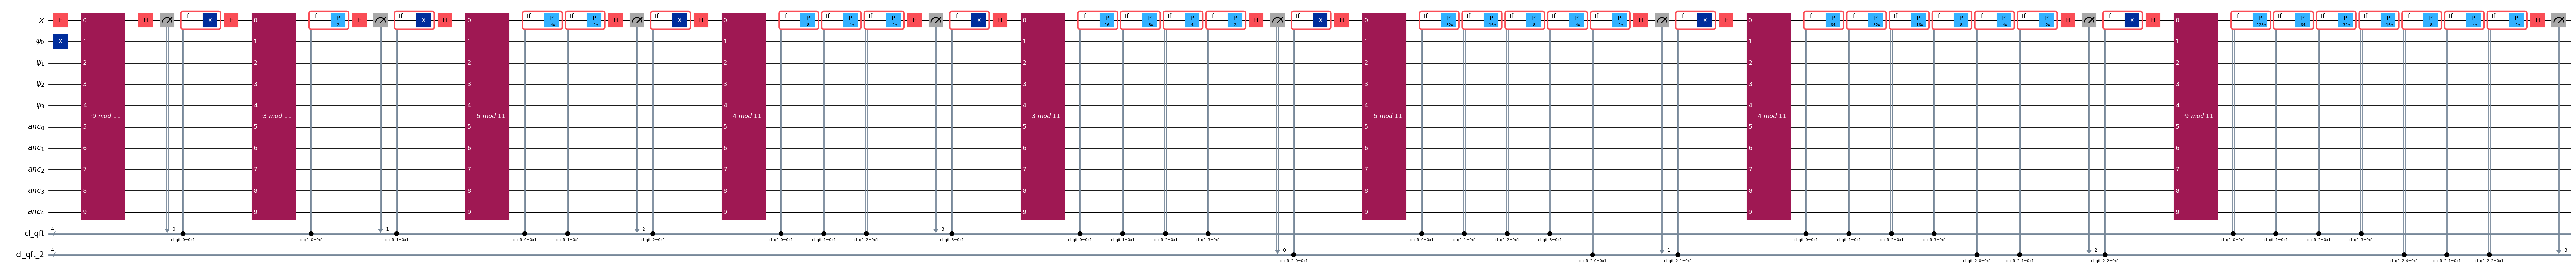

In [12]:
# g^k = 1 mod p, find k
p = 11
g = 4
b = 9

CircuitChooser().clear_caches()
CircuitChooser()._metric = cz_depth_metric
circuit = shors_dlp(g, b, p)

circuit.draw(output='mpl', fold=-1)